# <center>MICAS913 - Deep Learning </center>#
# <center> End-to-end Deep Learning of a Communication System </center>#
#  NAMES: Hanin Hamdi #
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
###  Email: hanin.hamdi@telecom-paris.fr #
### Email: amet1900@gmail.com #
### Github: https://github.com/Panongbene #

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Variables 

In [8]:
# variables
L = pow(10,6)                                       # distance
B = pow(10,10)                                      # bandwidth

# physical constants
a_dB = 2*pow(10,-4)                                 # power loss in dB
D = 17*pow(10,-6)                                   # dispersion ps/(nm-km)
gama = 1.27*pow(10,-3)                              # nonlinearity coefficient
nsp = 1                                             # a constant factor
h = 6.626*pow(10,-34)                               # Planck constant
lambda0 = 1.55*pow(10,-6)                           # center wavelength
f0 = 3*pow(10,8)/lambda0                            # center frequency


alpha = pow(10,-7)*np.log2(10)*0.2                  # loss coefficient
beta2 = -(pow(lambda0,2)*D)/(2*3.14*3*pow(10,8))    # dispersion coefficient


# scale factors
L0 = L                                              #
T0 = np.sqrt((-beta2*L)/2)                          #
P0 = 2/(gama*L)                                     #

# noise PSD
sigma02 = nsp*h*alpha*f0                            # physical
sigma2 = (sigma02*L)/(P0*T0)                        # normalized

## Plot Constellation

In [41]:
print("Normalize Peak Power = ", P0/(6*pow(10,-3)))

Normalize Peak Power =  0.26246719160104987


In [32]:
# Mapping Table
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

X = np.arange(-4,5,1)
X1 = X*0

Y1 = np.arange(-4,5,1)
Y = Y1*0

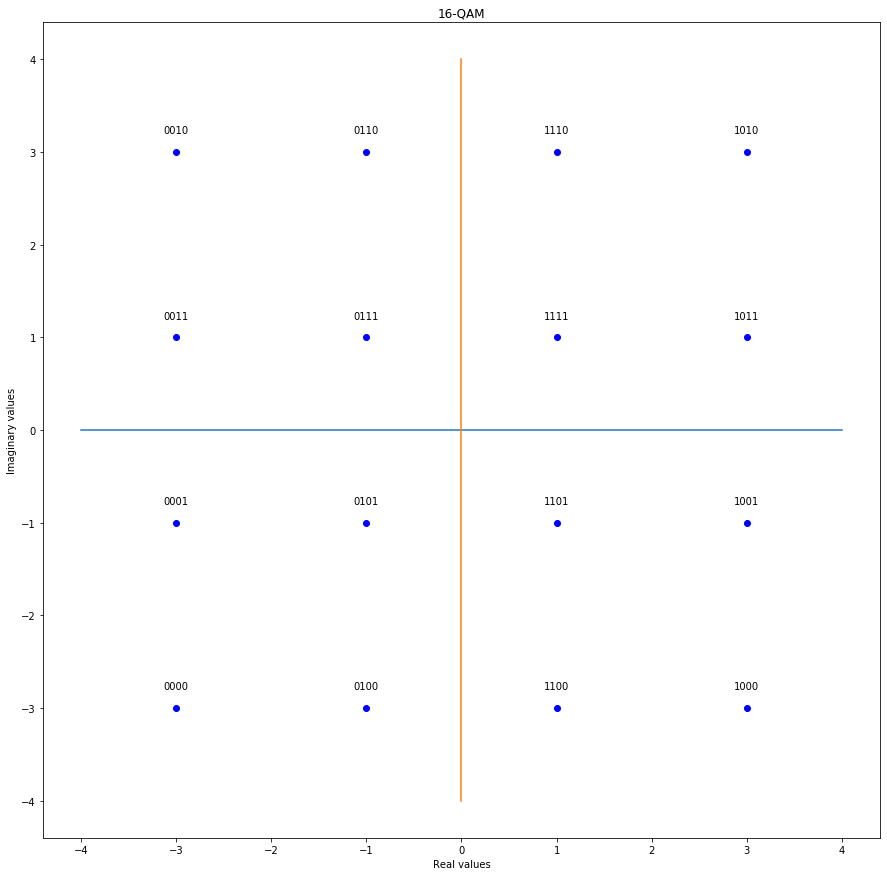

In [36]:
plt.figure(figsize=(15,15))

for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                B = (i, j, k, l)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

plt.plot(X,X1)
plt.plot(Y,Y1)

plt.title("16-QAM")
plt.xlabel('Real values')
plt.ylabel('Imaginary values')

plt.savefig('constellation.png')
plt.show()

## Generate Binary Source

In [45]:
def source(N, p):
    """This function Generate the binary source"""
    
    return np.random.binomial(1, p, N)        

In [90]:
len(source(1024, 1/2))

1024

## Bits To Symbols Mapping

In [426]:
def symbols_binariry_sequence(M):
    """This function map M symbols point to a binary sequence length log2(M)"""
    
    mapping_M = dict()
    
    for i in range(M):
        tamp = bin(i)[2:]
        lenght_tamp = int(np.log2(M))-len(tamp)
        for j in range(lenght_tamp):
            tamp='0'+tamp
        mapping_M[i] = tamp
        
    return mapping_M

In [429]:
symbols_binariry_sequence(8)

{0: '000',
 1: '001',
 2: '010',
 3: '011',
 4: '100',
 5: '101',
 6: '110',
 7: '111'}

In [430]:
def ham_dist(chaine1, chaine2):
    """This function compute the hamming distance"""
    
    return sum(c1!=c2 for c1, c2 in zip(chaine1, chaine2))  

In [431]:
def symbol_binariry_sequence_gray(M):
    """This function map M symbols to a binary sequence length log2(M) such that menimizing the hamming distance..."""
    
    tamp_mapping = symbols_binariry_sequence(M)
    
    mapping_M_gray = dict()
    
    mapping_M_gray[0] = tamp_mapping[0]
    
    del tamp_mapping[0]
    
    for i in range(1, M):
        k = 1
        for j in tamp_mapping:
            if(ham_dist(mapping_M_gray[i-1], tamp_mapping[j]) == 1):
                    #print(i, "  ", j)
                    mapping_M_gray[i] = tamp_mapping[j]
                    del tamp_mapping[j] 
                    break
            k += 1
        
            if(k == len(tamp_mapping)):
                return mapping_M_gray
                    
                    
    return mapping_M_gray

In [432]:
symbol_binariry_sequence_gray(8)

{0: '000',
 1: '001',
 2: '011',
 3: '010',
 4: '110',
 5: '100',
 6: '101',
 7: '111'}

In [448]:
def mapping_complexe_constellation(cnt):
    """This function map the symbol in complex"""
    
    M = len(cnt)
    M_log = int(np.log2(M))
    
    tamp_n = M//4
    tamp_n =  int(np.sqrt(tamp_n))
    X = [i+1 for i in range(tamp_n)]
    Y = [i+1 for i in range(tamp_n)]
    
    # Mapping
    S_tamp = dict()
    S_tamp_1 = dict()
    
    m_X = -tamp_n-1
    m_Y = tamp_n-1
    X_ = [-tamp_n]
    Y_ = [tamp_n]

    for i in range(2*tamp_n):
        if(m_X==0):
            m_X = m_X+1
            m_Y = m_Y-1
            continue
    
        X_.append(m_X)
        Y_.append(m_Y)
        m_Y-=1
        m_X+=1
        
    k = 0
    for i in Y_:
        for j in X_:
            S_tamp[k] = j+i*1j
            k+=1
            
    for i in range(M):
        S_tamp_1[cnt[i]] = S_tamp[i]        
    
    return S_tamp_1

In [449]:
def bit_to_symb(B, cnt):
    """This function """

    M = len(cnt)
    M_log = int(np.log2(M))
    n = int(len(B)/M_log)
    
    sub_sequence = dict()

    for i in range(n):
        tamp = ""
        for j in range(M_log):
            tamp = tamp +str(B[i*M_log+j])
        sub_sequence[i] = tamp
    
    # Mapping
    S_tamp_1 = mapping_complexe_constellation(cnt)

    S = dict()
    
    for i in range(n):
        S[i] = S_tamp_1[sub_sequence[i]]
    return S

In [450]:
# Test
B = source(1024, 1/2)
cnt = symbols_binariry_sequence(64)
S = bit_to_symb(B, cnt)

In [451]:
#print(S[0])
S[0]

(1+1j)

## Complete Main.m

In [454]:
# time mesh
T = 400                              # you have to choose this
N = pow(2,10)                        # you have to choose this
dt = T/N

# frequency mesh
F = 1/dt
df = 1/T


Bandwidth = 3

# bits to signal
M = 16                               # size of the constellation
n = 3                                # number of symbols (or sinc functions); test with s=1
p =1/2                               # probability of zero
b = source(nb, p)                    # Bernoulli source, random bits sequence
cnt = symbols_binariry_sequence(M)
s = bit_to_symb(b, cnt)              # symbol sequence; could be inside modulator.m
#q0 = mod(t, s, Bandwidth);                   # transmitted signal
#----------------------------------------------------------------------------------------------------
#t =np.arrange()
t =np.arange(N)*0.0                  # should be from -T/2 to T/2 with length N
f =np.arange(N)*0.0                  # should be from -F/2 to F/2 with length N

for j in range(N):
    t[j] = -(T/2)+(T/(N-1))*j
    f[j] = -(F/2)+(F/(N-1))*j*1.0

nb = L*int(np.log2(M))               # number of bits

## Modulation

In [475]:
def mod(t, S, Bandwidth):
    """This function compute the modulation"""
    
    Ns = len(s)
    l1 = -int(Ns/2)
    
    q_0_t = 0+0j
    
    for j in range(Ns):
        q_0_t+=S[j]*np.sin(Bandwidth*t-(l1+j))/(Bandwidth*t-(l1+j))
    
    return np.sqrt(Bandwidth)*q_0_t

In [1]:
mod(0.1, s, Bandwidth)

## Q(t,0) in Time and In Frequence

In [ ]:
Q_t_0 = list()
Bandwidth = pow(10,10)
for i in t:
    Q_t_0.append(mod(i, s, Bandwidth).real)

In [ ]:
plt.plot(t,Q_t_0)

plt.title("16-QAM")
plt.xlabel('Times(s)')
plt.ylabel('real(Q(t,0)) ')

#plt.savefig('constellation.png')
plt.show()